<center><font size="16">**Titanic: Machine Learning from Disaster**</font></center>

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this notebook, we will see how to dig deep into the data and visualize it.

 [![TITANIC sinking](https://i.imgur.com/8Rmg0vy.jpg)](https://youtu.be/9xoqXVjBEF8 "TITANIC sinking")

### Data

The data has been split into two groups:

- titanic data (titanic_data.csv) - this has the response variable ie, here Survived
- competition data (competition.csv) - this does not have the response variable 

The tasks given to you will be performed on "competition.csv"



### Data Dictionary

<center>
<table class="table table-bordered">
<tr>
<th style="width:5%">Variable</th><th style="width:5%">Definition</th><th style="width:5%">Key</th>
</tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</table>
</center>

# Wrangling & EDA

## 1. Loading Packages

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #will load seaborn's default theme and color palette to the session
%matplotlib inline

## 2. Loading Data & Basic Analysis

In [110]:
data = pd.read_csv('titanic_data.csv')
dftitanic = data.copy() #we are creating a copy so that we dont mess up the original one ,(now we can work on the copy)



In [111]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [112]:
dftitanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### Task 1
Import the competition file and copy it

In [113]:
#Write the code here
data_comp = pd.read_csv('competition.csv')
dfcomp = data_comp.copy()

In [114]:
data_comp.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [115]:
dfcomp.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


### Basic Structure

In [116]:
dftitanic.shape

(891, 12)

**Task 2:**
Find the shape of 'dfcomp'

In [117]:
#Write code here
dfcomp.shape

(418, 11)

In [118]:
data_comp.shape

(418, 11)

In [119]:
dftitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Task 3:**
Head for 'dfcomp'

In [120]:
#Write code here
dfcomp.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [121]:
dftitanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**Task 4:**
Find datatypes for dfcomp

In [122]:
#Write code here
dfcomp.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [123]:
dftitanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [124]:
dftitanic.describe(include=["O"]) #i,e include objects

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [125]:
dftitanic.describe(exclude=["O"])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [126]:
dftitanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**Task 5:** 
Describe statistics for 'dfcomp'

In [127]:
#Write code here -dfcomp.describe() after typing this press shift+tab to get more on the function(documentation)
dfcomp.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [128]:
dfcomp.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [129]:
dfcomp.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [130]:
dfcomp.describe(exclude=["O"])

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Completeness

In [131]:
dftitanic['Pclass'].unique()

array([3, 1, 2])

In [132]:
dftitanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [133]:
dftitanic['Pclass'].value_counts().reset_index()

,index,Pclass
0,3,491
1,1,216
2,2,184


In [134]:
dftitanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [135]:
dftitanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Task 6:**
Check completeness for 'dfcomp'

In [136]:
dfcomp.isnull()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,True,False,False,False,False,True,False


In [137]:
#Write code here
dfcomp.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## 3. Exploration

### 3.1 Exploration of Complete & Important Variables

Our response variable in the training set is complete, as well as Sex and Pclass, which seem two of the most important predictors.

**Survival**

<Axes: xlabel='Survived', ylabel='count'>

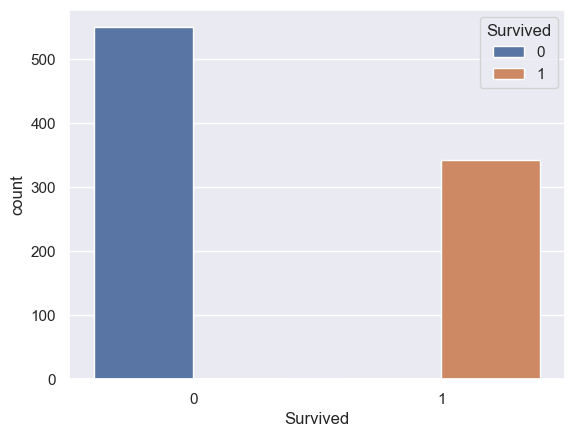

In [138]:
sns.countplot(x='Survived', hue='Survived', data=dftitanic) #hue means the legend(ie, according to what it should be viewd,ie what is 0 and what is 1)



**Gender & Survival**

<Axes: xlabel='Sex', ylabel='count'>

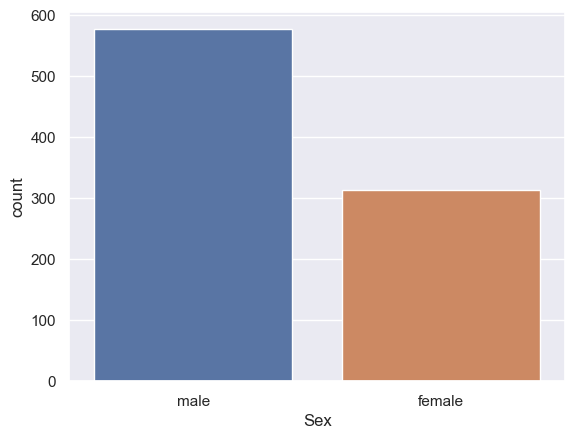

In [139]:
sns.countplot(x='Sex', data=dftitanic)

<Axes: xlabel='Sex', ylabel='count'>

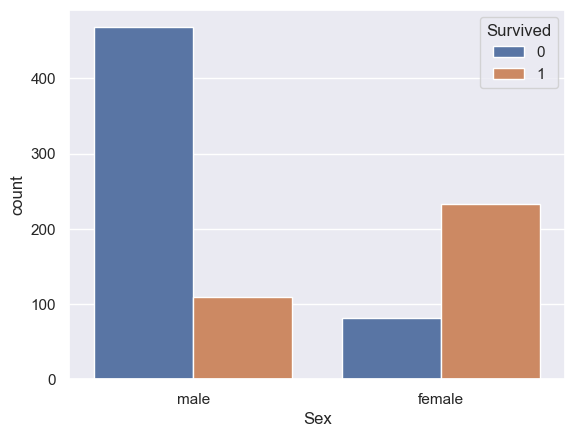

In [140]:
sns.countplot(x='Sex', hue='Survived', data=dftitanic)

**Task 7:**
Make a count plot for gender using 'dfcomp'

<Axes: xlabel='Sex', ylabel='count'>

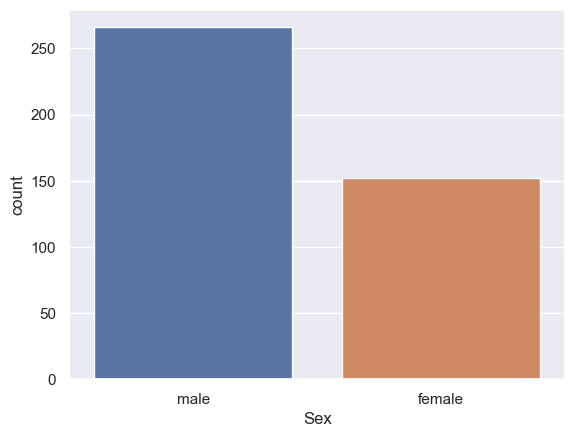

In [141]:
#Write code here
sns.countplot(x='Sex', data=dfcomp)

### Passenger Survival Class

<Axes: xlabel='Pclass', ylabel='count'>

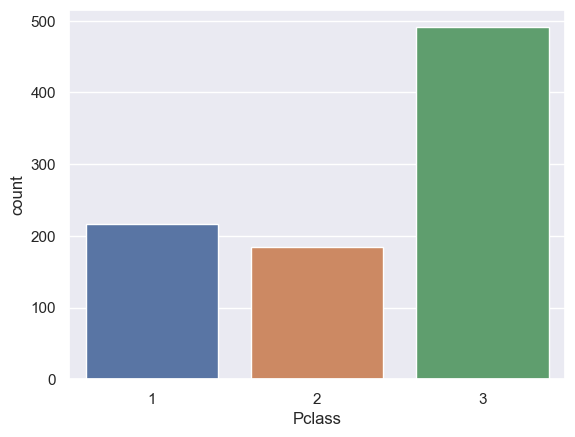

In [142]:
sns.countplot(x='Pclass', data=dftitanic)

**Task 8:**
Make a count plot for 'pclass' using 'dfcomp'

<Axes: xlabel='Pclass', ylabel='count'>

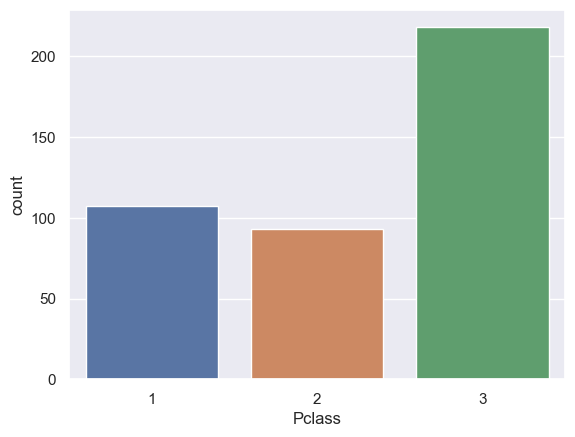

In [143]:
#Write code here
sns.countplot(x='Pclass',data=dfcomp)

<Axes: xlabel='Pclass', ylabel='count'>

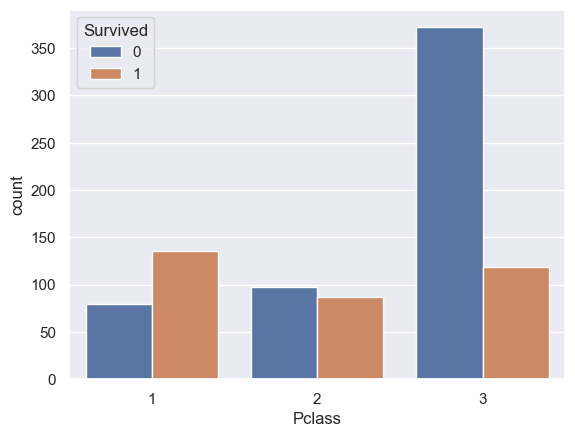

In [144]:
sns.countplot(x='Pclass', hue='Survived', data=dftitanic)

**Passenger Class, Gender & Survival**

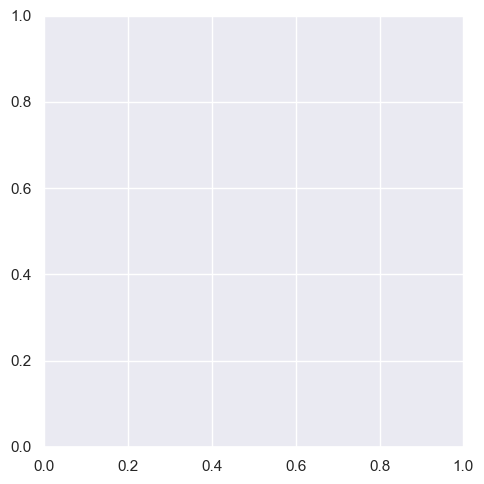

In [145]:
sns.catplot()

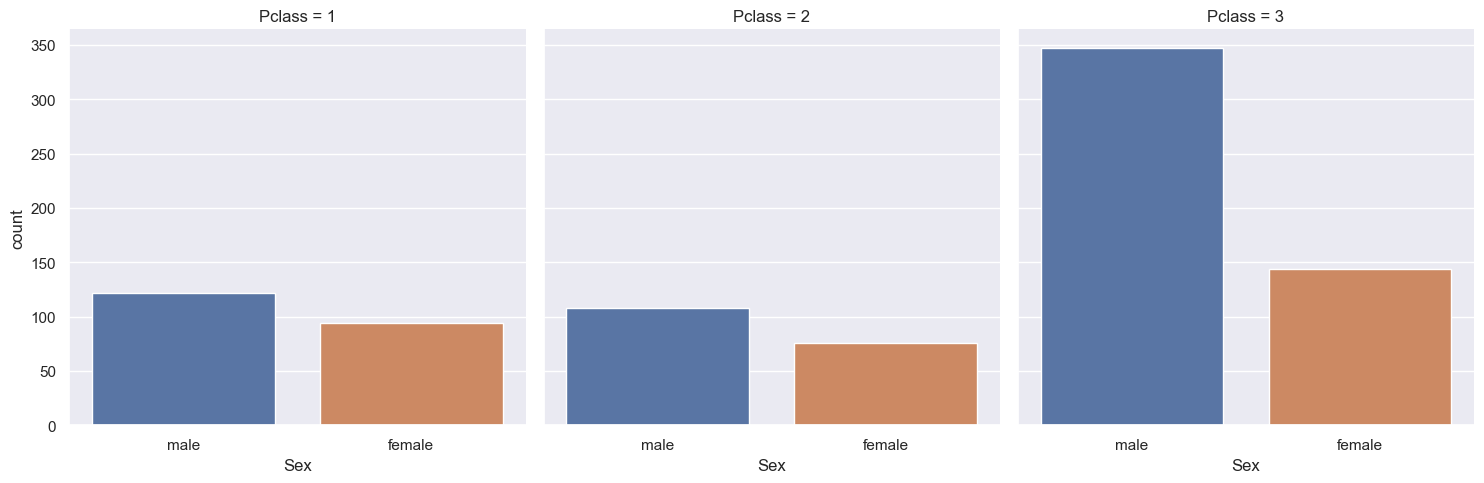

In [146]:
sns.catplot(x='Sex', col='Pclass', data=dftitanic, kind='count')

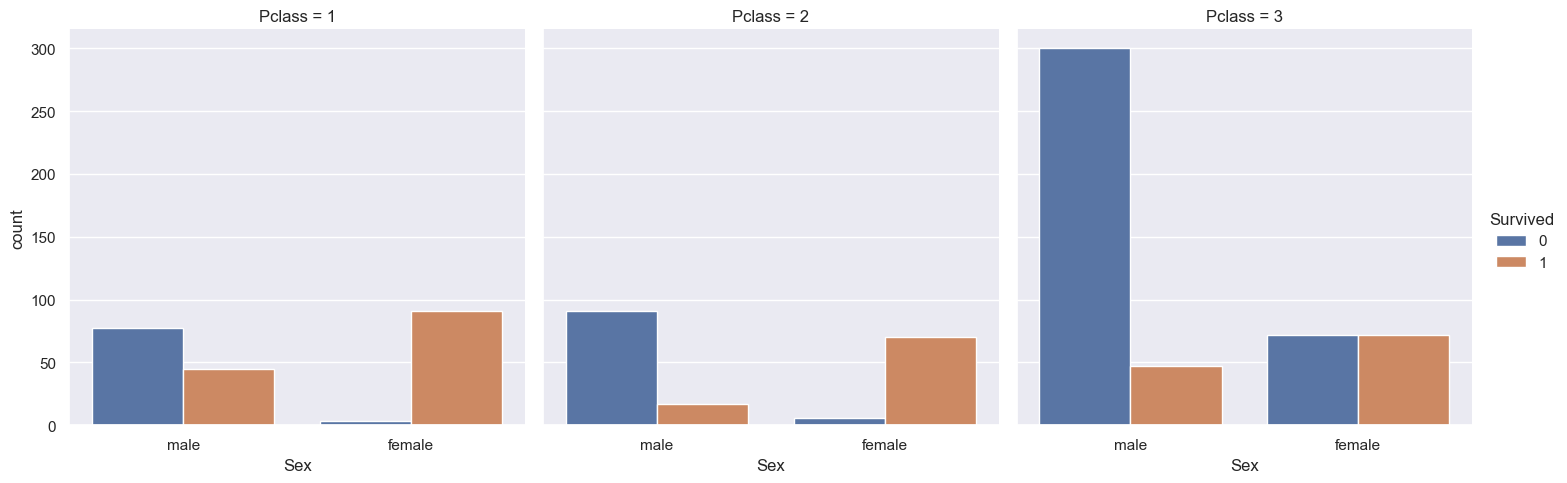

In [147]:
sns.catplot(x='Sex', col='Pclass', hue='Survived', data=dftitanic, kind='count')

**Task 9:** 
Make factor plot using dfcomp for gender, pclass and their count

In [148]:
# Write code here


### 3.2 What's in the name?

In [149]:
dftitanic['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

**Extracting & Analyzing Titles**

This is called feature engineering where you derive additional columns as per your domain knowledge like creating 'Title in the following example.

In [150]:
#EXAMPLE
import re  #re is manily used for search
a='Braund, Mr.Owen Harris'
re.search(' ([A-Z][a-z]+)\.', a).group(1) 
#we need to extract Mr
#( ([A-Z][a-z]+)\.)
# the space after the curved bracket because before Mr there is a space.
# [A-Z] first letter is Capital A-Z
#[a-z]+ second letter is small a-x and + represents there is more than one small letter 
# \. = |represents a precial character exits and . is the special character
#we give group(1) ie, ([A-Z][a-z]+) 
    #only have the [A-Z][a-z] which inreult will help us get rid of the space and (.)(special character)



'Mr'

In [151]:
dftitanic['Title'] = dftitanic['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1)) #creating a new column as we do not need the whole name and only the prefix(data cleaning)
dftitanic.head(20)

#or
#x=dftitanic['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
#dftitanic['Title']=x
#dftitanic.head()





,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [152]:
dftitanic['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

**Taks 10:**
Find the titles for dfcomp

In [153]:
# Write code here
dfcomp['Title']=dfcomp['Name'].apply(lambda x:re.search(' ([A-Z][a-z]+)\.',x).group(1))
dfcomp


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


**Task 11:**
Display the count for title in dfcomp

In [154]:
# Write the code here
dfcomp['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

The term *Mademoiselle* is a French familiar title, abbreviated **Mlle**, traditionally given to an unmarried woman. The equivalent in English is "Miss". However, the courtesy title "Madame" is accorded women where their marital status is unknown.

In [155]:
dftitanic['Title'] = dftitanic['Title'].replace('Mlle', 'Miss')

In France, one traditionally calls a young, unmarried woman Mademoiselle – Mlle for short – and an older, married woman _Madame_, whose abbreviation is **Mme**.

In [156]:
dftitanic['Title'] = dftitanic['Title'].replace('Mme', 'Mrs')

In [157]:
dftitanic['Title'].value_counts().reset_index()  #now you can Mlle and Mme is grouped to Miss and Mrs

,index,Title
0,Mr,517
1,Miss,184
2,Mrs,126
3,Master,40
4,Dr,7
5,Rev,6
6,Major,2
7,Col,2
8,Don,1
9,Ms,1


In [158]:
dftitanic.loc[(~dftitanic['Title'].isin(['Mr', 'Mrs', 'Miss', 'Master'])), 'Title'] = 'Rare Title' 



# ~ REPRESENTS (NOT)
# The logic of this command is that, the dftitanic titles that is not in ['Mr', 'Mrs', 'Miss', 'Master'] should be put in Rare Title
# df.loc[(row,'column name')]
#here df.loc=dftitanic.loc
#row=(~dftitanic['Title'].isin(['Mr', 'Mrs', 'Miss', 'Master']))
# column= 'Title'
# and this data is put into the new column 'Rare Title' 

In [159]:
dftitanic['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare Title'], dtype=object)

In [160]:
dftitanic['Title'].value_counts().reset_index()

,index,Title
0,Mr,517
1,Miss,184
2,Mrs,126
3,Master,40
4,Rare Title,24


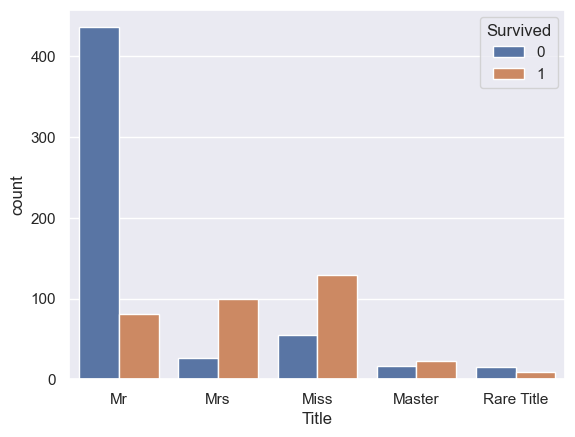

In [161]:
sns.countplot(data=dftitanic,x='Title', hue='Survived');

**Task 12:**
Assigning the remaining titles as 'Rare Title' in dfcomp

In [162]:
dfcomp['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [163]:
#Write the code here
dfcomp.loc[(~dfcomp['Title'].isin(['Mr', 'Mrs', 'Miss', 'Master'])), 'Title'] = 'Rare Title' 



In [164]:
dfcomp['Title'].value_counts()

Mr            240
Miss           78
Mrs            72
Master         21
Rare Title      7
Name: Title, dtype: int64

In [165]:
dfcomp['Title'].value_counts().reset_index()

,index,Title
0,Mr,240
1,Miss,78
2,Mrs,72
3,Master,21
4,Rare Title,7


### 3.3 Travelling Alone vs. Travelling in groups

**3.3.1 Family Size**

In [166]:
dftitanic['Fsize'] = dftitanic['SibSp'] + dftitanic['Parch']+1 




#creating a new column family_size('Fsize') as Sibling-Spouse('SibSp') and parent child('Parch') can be included in this
# we are using +1 to include the person itself in the family size





In [167]:
dftitanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


**Task 13:**
Show the countplot on column **'Fsize'** and check how many people are survived and died.

<Axes: xlabel='Fsize', ylabel='count'>

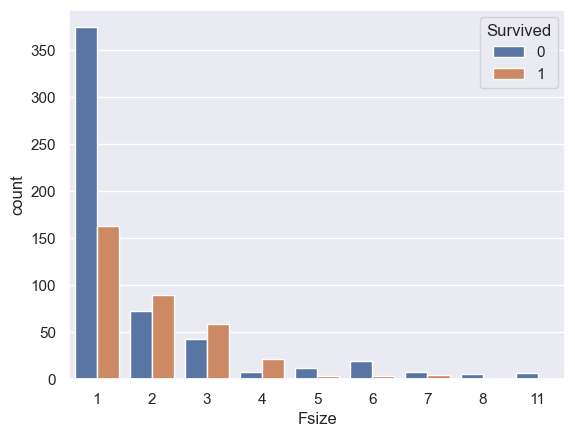

In [168]:
# Write the code here
sns.countplot(data=dftitanic,hue='Survived',x='Fsize')

In [169]:
dftitanic.groupby('Fsize')['Survived'].value_counts(normalize=True).reset_index(name='perc')

,Fsize,Survived,perc
0,1,0,0.696462
1,1,1,0.303538
2,2,1,0.552795
3,2,0,0.447205
4,3,1,0.578431
5,3,0,0.421569
6,4,1,0.724138
7,4,0,0.275862
8,5,0,0.800000
9,5,1,0.200000


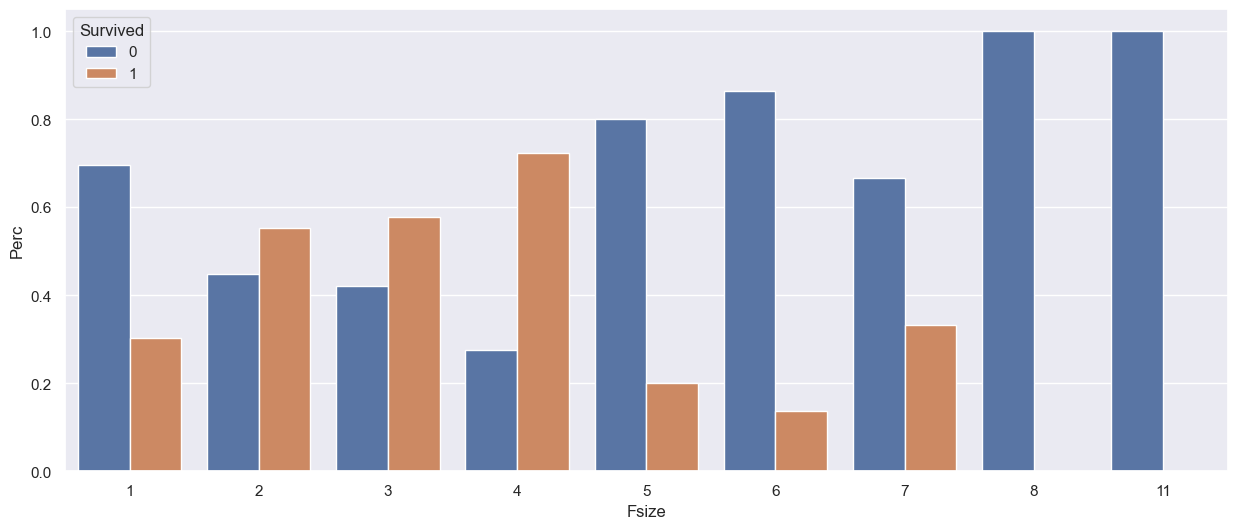

In [170]:
temp = dftitanic.groupby('Fsize')['Survived'].value_counts(normalize=True).reset_index(name='Perc')

plt.figure(figsize=(15,6));
sns.barplot(data=temp,x='Fsize', y='Perc', hue='Survived', dodge=True);
# dodge is USed to make  barchart into segmented barchart by specifying its value to be False

**3.3.2 How many people booked together?**

_Apart from families, there could be groups of friends travelling together._

In [171]:
dftitanic['Ticket'].value_counts() #JUST TO CHECK

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [172]:
dftitanic['Ticket'].value_counts().reset_index() #JUST TO CHECK

,index,Ticket
0,347082,7
1,CA. 2343,7
2,1601,7
3,3101295,6
4,CA 2144,6
...,...,...
676,9234,1
677,19988,1
678,2693,1
679,PC 17612,1


In [173]:
dftitanic['Ticket'].value_counts().head()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
Name: Ticket, dtype: int64

**reset_index()** is a method to reset index of a Data Frame. **reset_index()** method sets a list of integer ranging from 0 to length of data as index.

In [174]:
dftitanic['Ticket'].value_counts().reset_index().head()

,index,Ticket
0,347082,7
1,CA. 2343,7
2,1601,7
3,3101295,6
4,CA 2144,6


In [175]:
temp = dftitanic['Ticket'].value_counts().reset_index(name='Tsize') #renaming because there is already a column called ticket in the original df
#we are putting this data to a datafram so that we can merge this df to our original df in the next step
temp

,index,Tsize
0,347082,7
1,CA. 2343,7
2,1601,7
3,3101295,6
4,CA 2144,6
...,...,...
676,9234,1
677,19988,1
678,2693,1
679,PC 17612,1


In [176]:
dftitanic = dftitanic.merge(temp, left_on='Ticket', right_on='index',how='inner').drop('index', axis=1) 
#droping index as we dont want that(as that and ticket is same)
dftitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2
4,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S,Mr,2,2


**Task 14:**
Show the countplot on column **'Tsize'** and check how many people are survived and died.

<Axes: xlabel='Tsize', ylabel='count'>

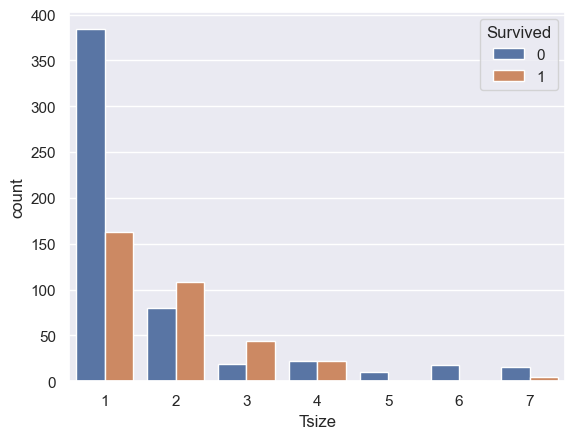

In [177]:
#write code here
sns.countplot(data=dftitanic,x='Tsize',hue='Survived')


In [178]:
temp = dftitanic.groupby('Tsize')['Survived'].value_counts(normalize=True).reset_index(name='Perc')
temp

,Tsize,Survived,Perc
0,1,0,0.702011
1,1,1,0.297989
2,2,1,0.574468
3,2,0,0.425532
4,3,1,0.698413
5,3,0,0.301587
6,4,0,0.500000
7,4,1,0.500000
8,5,0,1.000000
9,6,0,1.000000


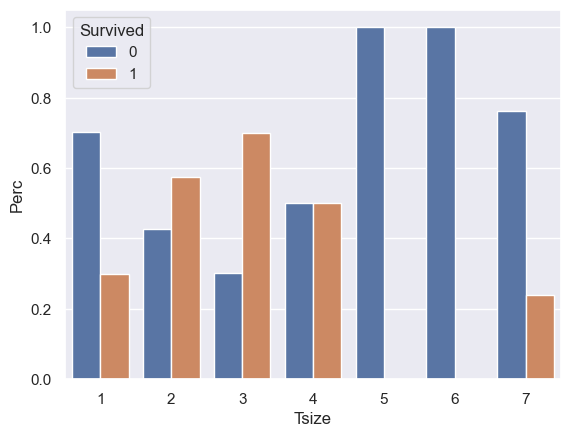

In [179]:
sns.barplot(x='Tsize', y='Perc', hue='Survived', data=temp, dodge=True);

**3.3.3 Consolidating family & friends**

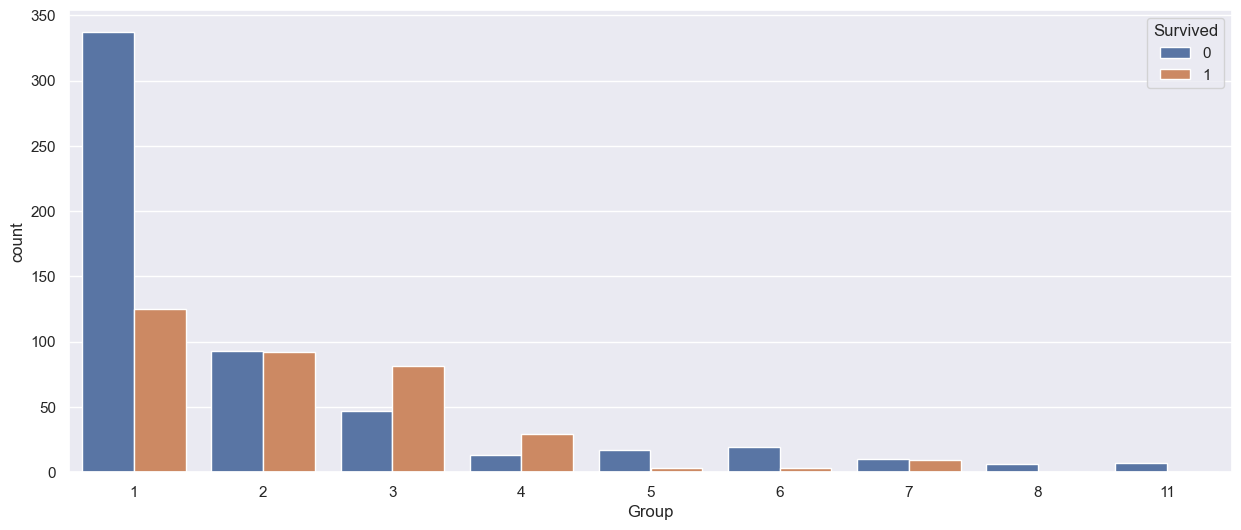

In [180]:
dftitanic['Group'] = dftitanic[['Tsize', 'Fsize']].max(axis=1) #creating another column,ie 

plt.figure(figsize=(15,6));
sns.countplot(x='Group', hue='Survived', data=dftitanic);
#we use semi colon as we are using 2 different libraries(plt,sns),so inorder to get it in one graph
#(if we do not do that we will get seperate graphs)

In [181]:
dftitanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2,2
4,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S,Mr,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,Mr,1,1,1
887,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rare Title,1,1,1
888,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1,1,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,1,1,1


In [182]:
dftitanic['GrpSize'] = ''
dftitanic.loc[dftitanic['Group']==1, 'GrpSize'] = dftitanic.loc[dftitanic['Group']==1, 'GrpSize'].replace('', 'solo')
dftitanic.loc[dftitanic['Group']==2, 'GrpSize'] = dftitanic.loc[dftitanic['Group']==2, 'GrpSize'].replace('', 'couple')
dftitanic.loc[(dftitanic['Group']<=4) & (dftitanic['Group']>=3), 'GrpSize'] = dftitanic.loc[(dftitanic['Group']<=4) & (dftitanic['Group']>=3), 'GrpSize'].replace('', 'group')
dftitanic.loc[dftitanic['Group']>4, 'GrpSize'] = dftitanic.loc[dftitanic['Group']>4, 'GrpSize'].replace('', 'large group')
dftitanic.head()



#first half is the condition on which all rows
#second half is the replacing part on those rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1,2,couple
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,2,couple
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1,solo
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2,2,couple
4,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S,Mr,2,2,2,couple


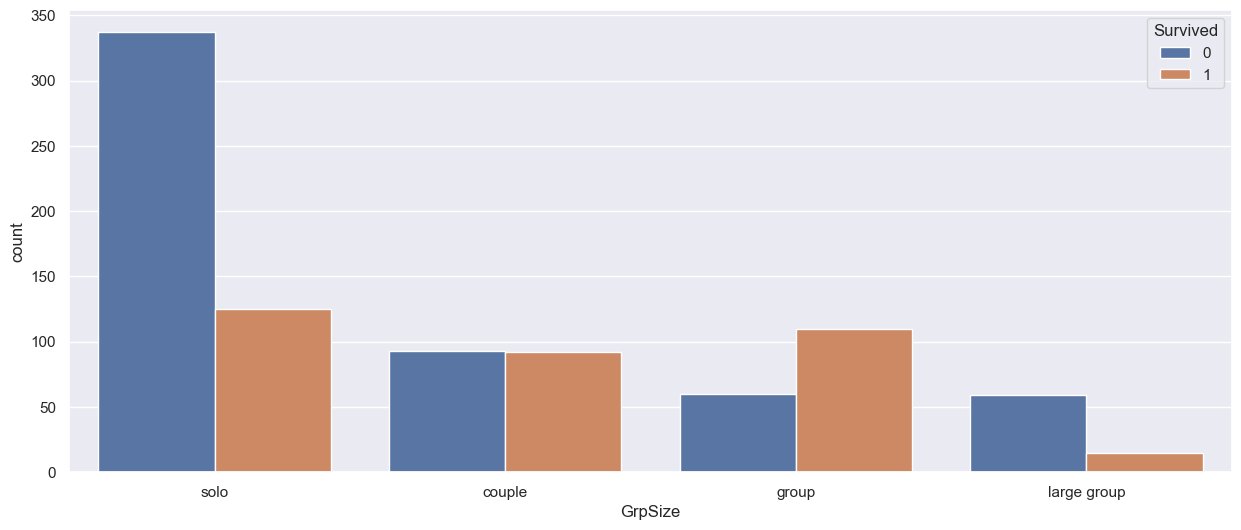

In [183]:
plt.figure(figsize=(15,6));
sns.countplot(x='GrpSize', order=['solo', 'couple', 'group', 'large group'], hue='Survived', data=dftitanic);

**Task 15:**
Applying same transformation on **'dfcomp'**

- FSize task
- Tsize task
- Group Column

In [184]:
dfcomp

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Rare Title
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


In [185]:
#Fsize
dfcomp['Fsize']=dfcomp['SibSp'] + dfcomp['Parch'] +1


In [186]:
dfcomp

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Rare Title,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,1
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr,1


In [187]:
#Ticket Size
temp=dfcomp['Ticket'].value_counts().reset_index(name='Tsize') 
#doing altogether which we did step by step in dftitanic
temp


,index,Tsize
0,PC 17608,5
1,CA. 2343,4
2,113503,4
3,PC 17483,3
4,220845,3
...,...,...
358,349226,1
359,2621,1
360,4133,1
361,113780,1


In [188]:
dfcomp=dfcomp.merge(temp,left_on='Ticket',right_on='index',how='inner').drop('index', axis=1) 


In [189]:
dfcomp

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr,1,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Rare Title,1,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,1,1
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr,1,1


In [190]:
# Grouping
dfcomp['Group'] = dfcomp[['Tsize', 'Fsize']].max(axis=1) #creating another column


In [191]:
dfcomp

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2,1,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr,1,1,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Rare Title,1,1,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,1,1,1
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr,1,1,1


Applying the same categories for groups on 'dfcomp'

In [192]:
dfcomp['GrpSize'] = ''
dfcomp.loc[dfcomp['Group']==1, 'GrpSize'] = dfcomp.loc[dfcomp['Group']==1, 'GrpSize'].replace('', 'solo')
dfcomp.loc[dfcomp['Group']==2, 'GrpSize'] = dfcomp.loc[dfcomp['Group']==2, 'GrpSize'].replace('', 'couple')
dfcomp.loc[(dfcomp['Group']<=4) & (dfcomp['Group']>=3), 'GrpSize'] = dfcomp.loc[(dfcomp['Group']<=4) & (dfcomp['Group']>=3), 'GrpSize'].replace('', 'group')
dfcomp.loc[dfcomp['Group']>4, 'GrpSize'] = dfcomp.loc[dfcomp['Group']>4, 'GrpSize'].replace('', 'large group')
dfcomp.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1,1,1,solo
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2,1,2,couple
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1,1,1,solo
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1,1,1,solo
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3,1,3,group


### 3.4 Effect of Fare

**Task 16:**
Check the null values of fare

In [193]:
# Write code here
dftitanic['Fare'].isnull().sum()

0

/var/folders/ns/dh5y29hd3rxf9lvsl6p7m3rw0000gn/T/ipykernel_2365/2336507706.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dftitanic['Fare']);


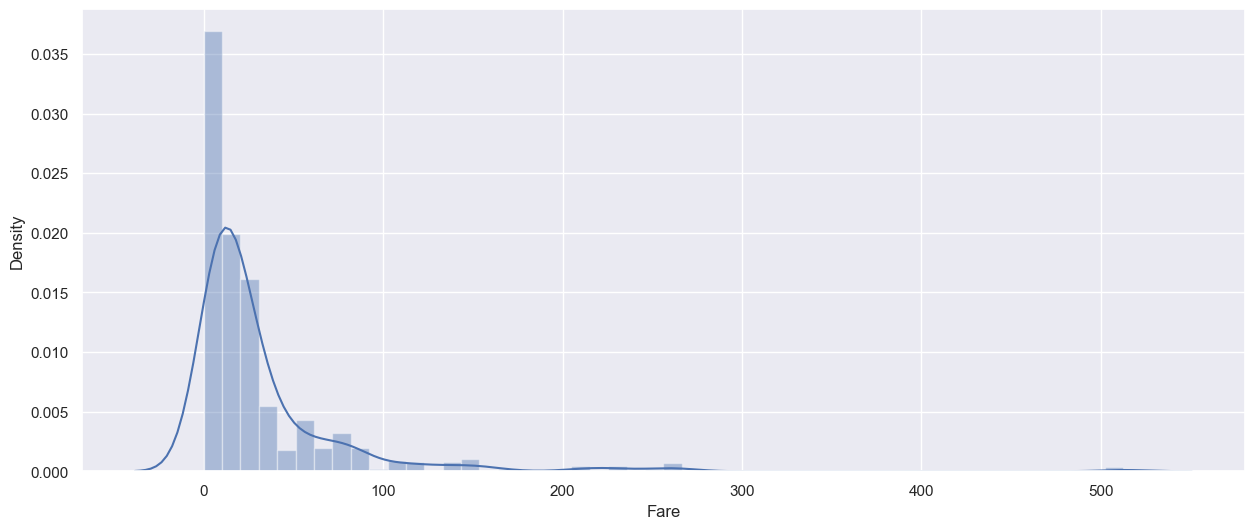

In [87]:
plt.subplots(figsize=(15,6))
sns.distplot(dftitanic['Fare']);

In [88]:
dftitanic[dftitanic['Fare'] < 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize


In [89]:
dftitanic[dftitanic['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize
266,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Mr,1,4,4,group
267,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Mr,1,4,4,group
268,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Mr,1,4,4,group
269,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Mr,1,4,4,group
366,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,Mr,1,1,1,solo
386,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,Mr,1,3,3,group
387,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,Mr,1,3,3,group
388,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,Mr,1,3,3,group
592,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,Mr,1,1,1,solo
715,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,Mr,1,1,1,solo


In [90]:
dftitanic.loc[(dftitanic['Fare'] == 0) & (dftitanic['Pclass'] == 1), 'Fare'] = dftitanic[dftitanic['Pclass'] == 1]['Fare'].median()
dftitanic.loc[(dftitanic['Fare'] == 0) & (dftitanic['Pclass'] == 2), 'Fare'] = dftitanic[dftitanic['Pclass'] == 2]['Fare'].median()
dftitanic.loc[(dftitanic['Fare'] == 0) & (dftitanic['Pclass'] == 3), 'Fare'] = dftitanic[dftitanic['Pclass'] == 3]['Fare'].median()


#whoever have 0 as fare, we will replace it with the median(as it is skewwed we use median) of the passenger class they are travelling in)


In [91]:
dftitanic[dftitanic['Fare']==0] #now we have no 0 values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize


Assigning categories to fare

In [92]:
#creating a column to describe the same as a categorical ordinal column

dftitanic['FareCat'] = ''
dftitanic.loc[dftitanic['Fare']<=10, 'FareCat'] = '0-10'
dftitanic.loc[(dftitanic['Fare']>10) & (dftitanic['Fare']<=25), 'FareCat'] = '10-25'
dftitanic.loc[(dftitanic['Fare']>25) & (dftitanic['Fare']<=40), 'FareCat'] = '25-40'
dftitanic.loc[(dftitanic['Fare']>40) & (dftitanic['Fare']<=70), 'FareCat'] = '40-70'
dftitanic.loc[(dftitanic['Fare']>70) & (dftitanic['Fare']<=100), 'FareCat'] = '70-100'
dftitanic.loc[dftitanic['Fare']>100, 'FareCat'] = '100+'
dftitanic[['Fare', 'FareCat']].head()

,Fare,FareCat
0,7.2500,0-10
1,71.2833,70-100
2,7.9250,0-10
3,53.1000,40-70
4,53.1000,40-70


In [93]:
dftitanic['FareCat'].value_counts().reset_index()

,index,FareCat
0,0-10,325
1,10-25,227
2,25-40,158
3,40-70,76
4,100+,53
5,70-100,52


In [94]:
dftitanic.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize,FareCat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1,2,couple,0-10
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,2,couple,70-100
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1,solo,0-10
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2,2,couple,40-70
4,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S,Mr,2,2,2,couple,40-70
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1,1,solo,0-10
6,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,1,1,1,solo,0-10


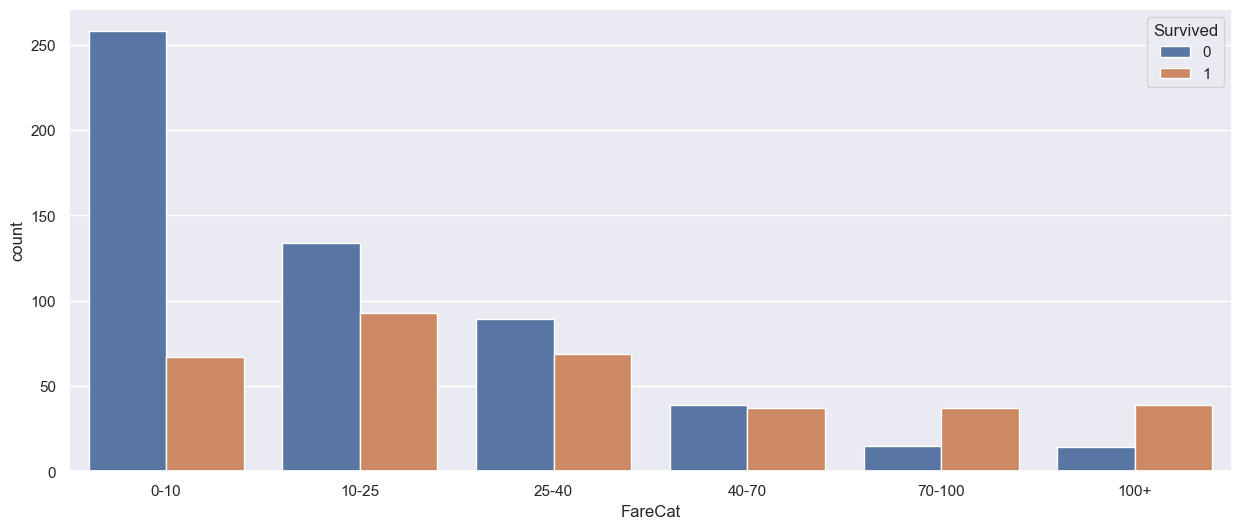

In [95]:
plt.subplots(figsize=(15,6))
sns.countplot(x='FareCat', order=['0-10', '10-25', '25-40', '40-70', '70-100', '100+'], hue='Survived', data=dftitanic);

**Task 17:** 
Applying same changes on **'dfcomp'**

- First check if Fair is zero
- Then replace it with median fare of Pclass

In [96]:
#Write code to check the Fair
dfcomp['Fare'].isnull().sum()

1

In [97]:
dfcomp['Fare'].isnull().value_counts().reset_index()

,index,Fare
0,False,417
1,True,1


/var/folders/ns/dh5y29hd3rxf9lvsl6p7m3rw0000gn/T/ipykernel_2365/2336507706.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dftitanic['Fare']);


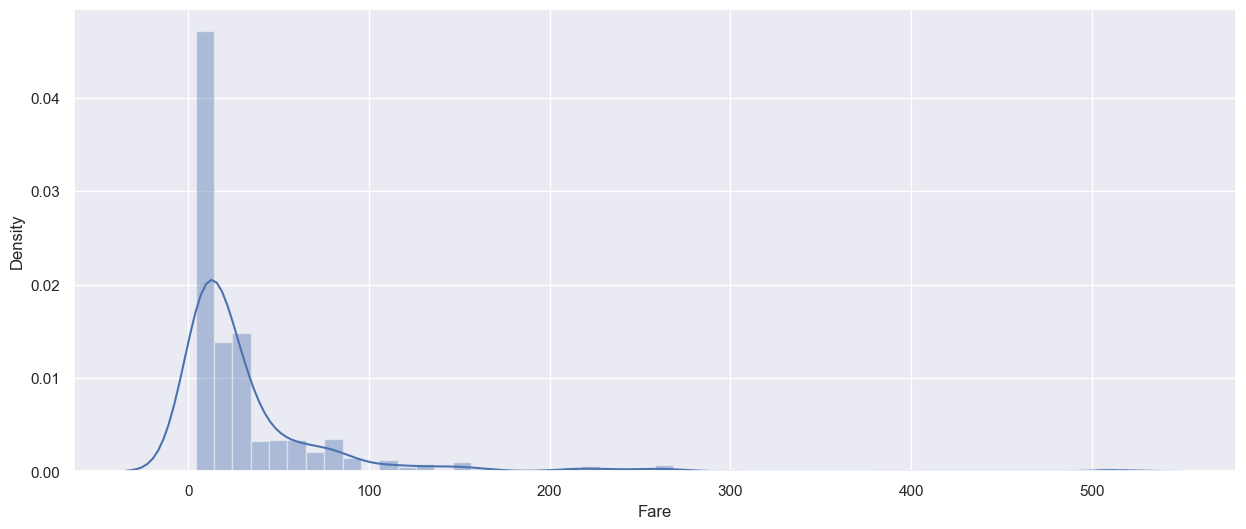

In [98]:
plt.subplots(figsize=(15,6))
sns.distplot(dftitanic['Fare']);

In [99]:
dfcomp[dfcomp['Fare'] == 0] #there is originally 2 '0.0'

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize
294,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,NaN,S,Mr,1,1,1,solo
383,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S,Mr,1,1,1,solo


In [100]:
#write the code to find the median
dfcomp.loc[(dfcomp['Fare'] == 0) & (dfcomp['Pclass'] == 1), 'Fare'] = dfcomp[dfcomp['Pclass'] == 1]['Fare'].median()
dfcomp.loc[(dfcomp['Fare'] == 0) & (dfcomp['Pclass'] == 2), 'Fare'] = dfcomp[dfcomp['Pclass'] == 2]['Fare'].median()
dfcomp.loc[(dfcomp['Fare'] == 0) & (dfcomp['Pclass'] == 3), 'Fare'] = dfcomp[dfcomp['Pclass'] == 3]['Fare'].median()


**Task 18:** 
Make categories of fare as following:

- If Fare is <=10, then category= '0-10' 
- If Fare is >10 and Fare is <=25, then category= '10-25'
- If Fare is >25 and Fare is <=40, then category= '25-40'
- If Fare is >40 and Fare is <=70, then category= '40-70'
- If Fare is >70 and Fare is <=100, then category= '70-100'
- If Fare is >100, then category= '100+'

In [101]:
#Write the code for Assigning Categories
dfcomp['FareCat'] = ''
dfcomp.loc[dfcomp['Fare']<=10, 'FareCat'] = '0-10'
dfcomp.loc[(dfcomp['Fare']>10) & (dfcomp['Fare']<=25), 'FareCat'] = '10-25'
dfcomp.loc[(dfcomp['Fare']>25) & (dfcomp['Fare']<=40), 'FareCat'] = '25-40'
dfcomp.loc[(dfcomp['Fare']>40) & (dfcomp['Fare']<=70), 'FareCat'] = '40-70'
dfcomp.loc[(dfcomp['Fare']>70) & (dfcomp['Fare']<=100), 'FareCat'] = '70-100'
dfcomp.loc[dfcomp['Fare']>100, 'FareCat'] = '100+'


dfcomp[['Fare', 'FareCat']].head()

,Fare,FareCat
0,7.8292,0-10
1,7.0000,0-10
2,9.6875,0-10
3,8.6625,0-10
4,12.2875,10-25


### 3.5 Effect of Embarked variable

_C = Cherbourg(France), Q = Queenstown(Ireland), S = Southampton(England)_

**Task 19:** 
Make the countplot for embarkments   

In [102]:
# Write the code here



***Engineered Features***

In [103]:
dftitanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize,FareCat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1,2,couple,0-10
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,2,couple,70-100


**Task 20:**
Check the engineered features for dfcomp

In [104]:
#Write the code here



## 4. Missing Values

### 4.1 Age

/var/folders/ns/dh5y29hd3rxf9lvsl6p7m3rw0000gn/T/ipykernel_2365/2812822363.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dftitanic[dftitanic['Survived'] == 0]['Age'].dropna(), shade=True,label="Not survived");
/var/folders/ns/dh5y29hd3rxf9lvsl6p7m3rw0000gn/T/ipykernel_2365/2812822363.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dftitanic[dftitanic['Survived'] == 1]['Age'].dropna(), shade=True,label="Survived");


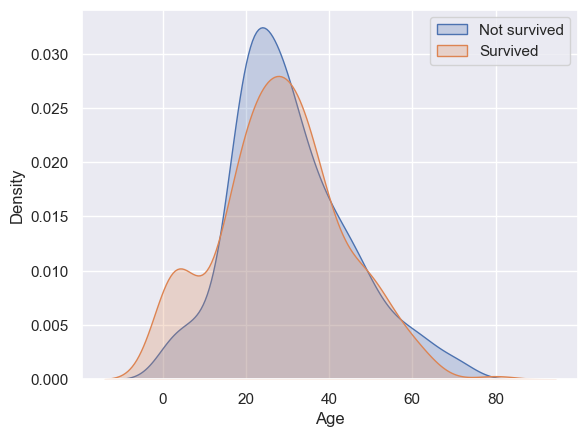

In [105]:
#Kernal Density Estimator
sns.kdeplot(dftitanic[dftitanic['Survived'] == 0]['Age'].dropna(), shade=True,label="Not survived"); 
sns.kdeplot(dftitanic[dftitanic['Survived'] == 1]['Age'].dropna(), shade=True,label="Survived");
plt.legend() #for the legend to be shown

In [106]:
temp = dftitanic[dftitanic['Age'].isnull() == False]

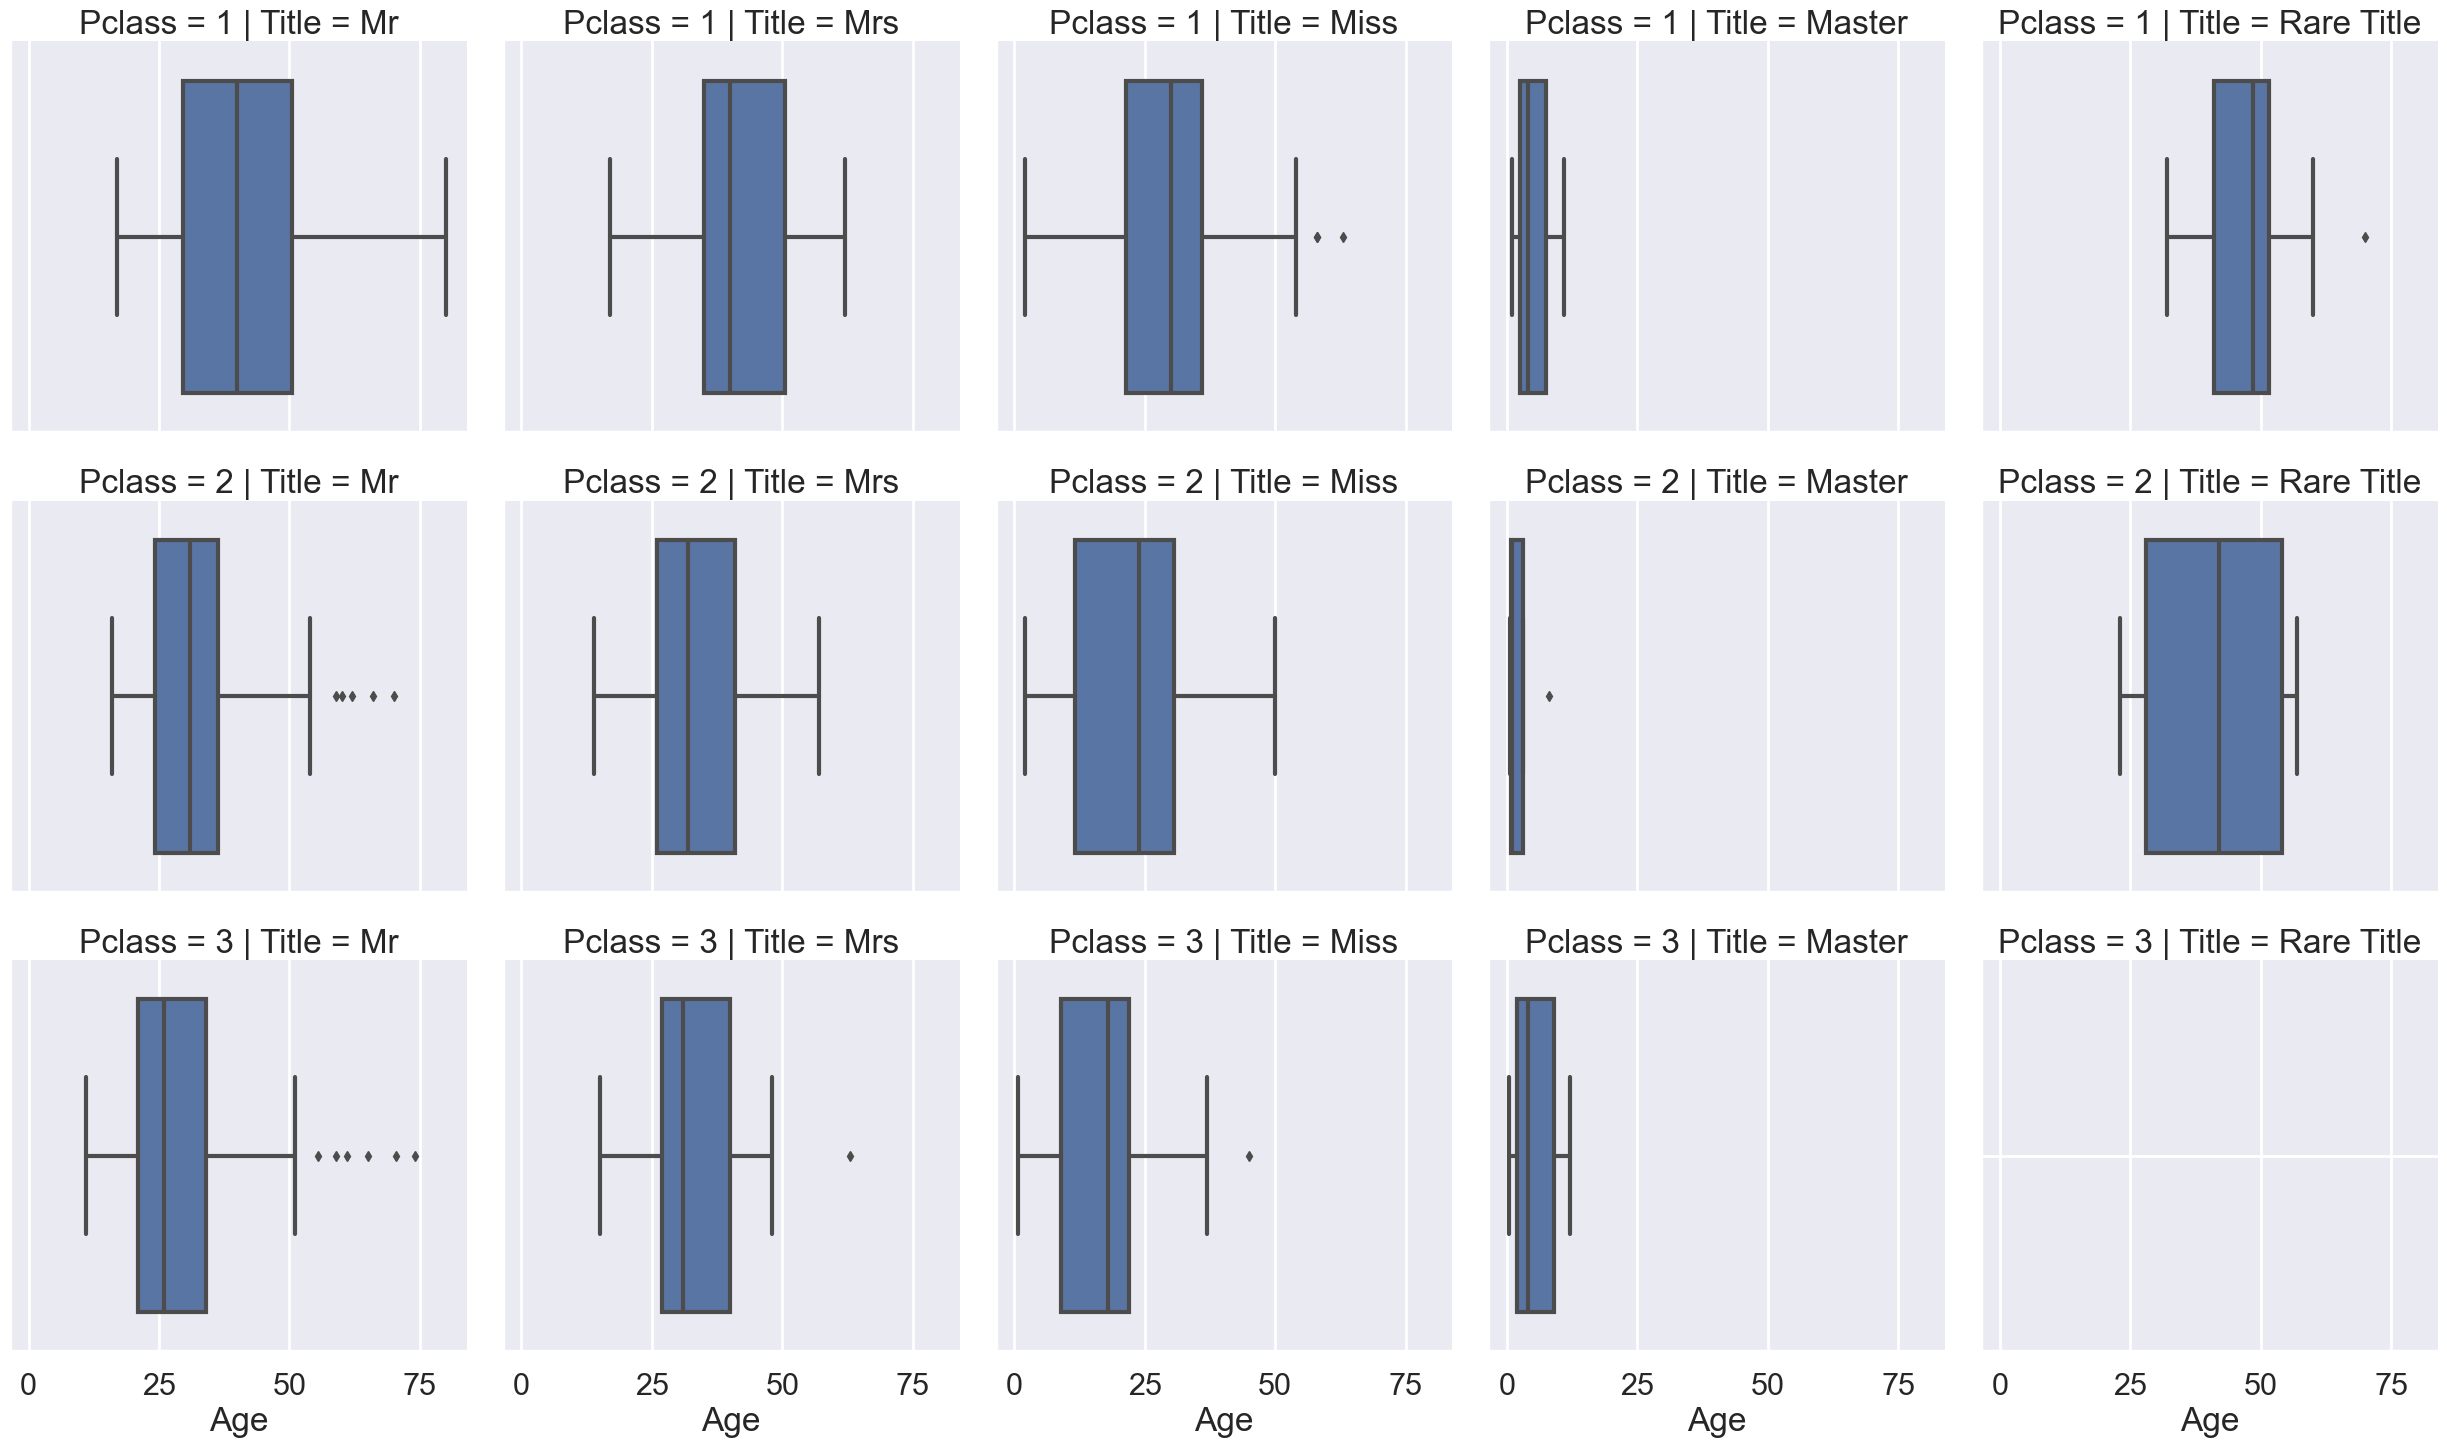

In [107]:
sns.set_context('poster')
sns.catplot(kind='box', x='Age', col='Title', row='Pclass', data=temp);

In [108]:
#to complete the missing value for age

for t in dftitanic['Title'].unique(): #THE FOR LOOP VALUES WILL BE Mr, Mrs, Miss, Master, Rare Title
    for p in dftitanic['Pclass'].unique(): #THE FOR LOOP VALUES WILL BE Pclass: 1,2,3
        dftitanic.loc[(dftitanic['Title'] == t) & (dftitanic['Pclass'] == p) & (dftitanic['Age'].isnull()), 'Age'] = dftitanic.loc[(dftitanic['Title'] == t) & (dftitanic['Pclass'] == p), 'Age'].median()
        
        
        
        

/var/folders/ns/dh5y29hd3rxf9lvsl6p7m3rw0000gn/T/ipykernel_2365/1346470427.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dftitanic[dftitanic['Survived'] == 0]['Age'], shade=True,label='Not Survived');
/var/folders/ns/dh5y29hd3rxf9lvsl6p7m3rw0000gn/T/ipykernel_2365/1346470427.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dftitanic[dftitanic['Survived'] == 1]['Age'], shade=True,label='Survived');


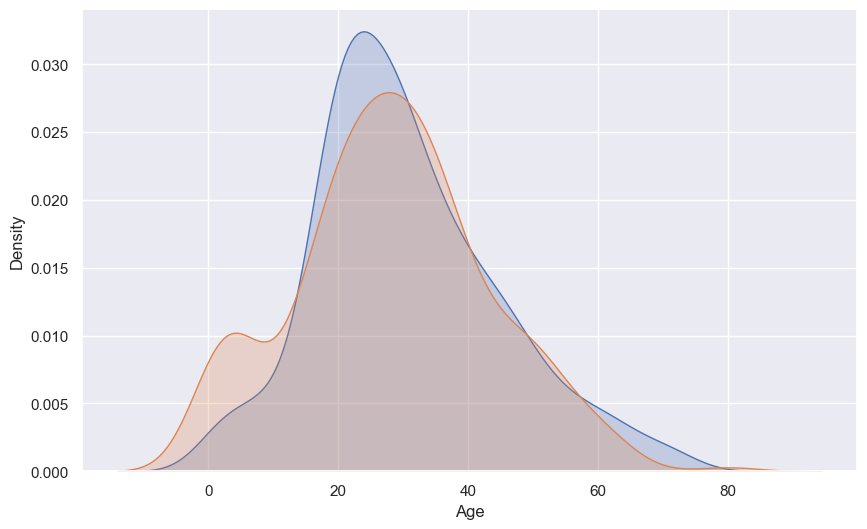

In [194]:
plt.subplots(figsize=(10,6))
sns.kdeplot(dftitanic[dftitanic['Survived'] == 0]['Age'], shade=True,label='Not Survived');
sns.kdeplot(dftitanic[dftitanic['Survived'] == 1]['Age'], shade=True,label='Survived');

**Task 21:**
Check if there is any null in the column 'Age'

In [112]:
#Write code here

dftitanic['Age'].isnull().sum() #now it is 0,previously it was 177

0

Creating Age categories

In [113]:
#creating a column to describe the same as a categorical ordinal column
dftitanic['AgeCat']=''
dftitanic.loc[ dftitanic['Age'] <= 16, 'AgeCat'] = '0-16'
dftitanic.loc[(dftitanic['Age'] > 16) & (dftitanic['Age'] <= 32), 'AgeCat'] = '16-32'
dftitanic.loc[(dftitanic['Age'] > 32) & (dftitanic['Age'] <= 48), 'AgeCat'] = '32-48'
dftitanic.loc[(dftitanic['Age'] > 48) & (dftitanic['Age'] <= 64), 'AgeCat'] = '48-64'
dftitanic.loc[ dftitanic['Age'] > 64, 'AgeCat']= '64+'

In [114]:
dftitanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize,FareCat,AgeCat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1,2,couple,0-10,16-32
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,2,couple,70-100,32-48
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1,solo,0-10,16-32
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2,2,couple,40-70,32-48
4,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S,Mr,2,2,2,couple,40-70,32-48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,Mr,1,1,1,solo,0-10,16-32
887,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rare Title,1,1,1,solo,10-25,16-32
888,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1,1,1,solo,25-40,16-32
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,1,1,1,solo,25-40,16-32


**Task 22:**
Replace missing Age & Fair values in **'dfcomp'**

In [ ]:
#Write the code for filling in the values with median




In [116]:
dfcomp['Fare'].isnull().sum() #changing the null values

1

In [123]:
dfcomp['Fare'].isnull().value_counts().reset_index()

,index,Fare
0,False,417
1,True,1


In [124]:
x= dfcomp['Fare'].median
dfcomp['Fare'] =dfcomp['Fare'].fillna(x)

In [125]:
dfcomp['Fare'].isnull().sum() #now its 0

0

In [126]:
dfcomp['Fare'].isnull().value_counts().reset_index()

,index,Fare
0,False,418


In [118]:
dfcomp[dfcomp['Fare'] == 0] #now changing the 0 values

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize
294,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,NaN,S,Mr,1,1,1,solo
383,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S,Mr,1,1,1,solo


In [120]:
dfcomp.loc[(dfcomp['Fare'] == 0) & (dfcomp['Pclass'] == 1), 'Fare'] = dfcomp[dfcomp['Pclass'] == 1]['Fare'].median()


In [121]:
dfcomp[dfcomp['Fare'] == 0]


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize


Checking the null values in 'Age' column again!

In [133]:
dfcomp['Age'].isnull().sum()

86

Checking the **pclass** and **title** for which the null value exists

In [134]:
dfcomp.loc[(dfcomp['Age'].isnull()),'Pclass':'Title'] 

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
10,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S,Mr
24,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S,Mrs
35,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C,Mr
36,3,"Samaan, Mr. Hanna",male,NaN,2,0,2662,21.6792,NaN,C,Mr
43,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...
409,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q,Miss
410,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.75,NaN,Q,Miss
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.05,NaN,S,Mr
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.05,NaN,S,Mr


Filling in the missing value with the median of the specific **pclass**

In [143]:
#hint 
#dfcomp.loc[(dfcomp['Age'].isnull()) & (dfcomp['Pclass'] == 3) & (dfcomp['Title'] == 'Rare Title'), 'Age'] = dfcomp.loc[(dfcomp['Title'] == 'Rare Title') & (dfcomp['Pclass'] == 3), 'Age'].median()



In [150]:
for t in dfcomp['Title'].unique(): #THE FOR LOOP VALUES WILL BE Mr, Mrs, Miss, Master, Rare Title
    for p in dfcomp['Pclass'].unique(): #THE FOR LOOP VALUES WILL BE Pclass: 1,2,3
        dfcomp.loc[(dfcomp['Title'] == t) & (dfcomp['Pclass'] == p) & (dfcomp['Age'].isnull()), 'Age'] = dfcomp.loc[(dfcomp['Title'] == t) & (dfcomp['Pclass'] == p), 'Age'].median()

        
        

In [151]:
dfcomp['Age'].isnull().sum()

1

In [152]:
dfcomp['Age'].isnull().value_counts().reset_index()

,index,Age
0,False,417
1,True,1


In [161]:
dfcomp.loc[(dfcomp['Age'].isnull()),'Pclass':'Title'] #so the one left is NaN

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
105,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.75,NaN,Q,Rare Title


In [ ]:
dfcomp['Age'].

In [163]:
x= dfcomp['Age'].median
dfcomp['Age'] =dfcomp['Age'].fillna(x)

In [164]:
dfcomp['Age'].isnull().sum()

0

**Task 23:**
Repeat the above procedure for **'Fare'**

In [146]:
#Write the code to check if there is any null value 

#did it above for Fare

0

In [ ]:
#Write code to check the pclass and title for which the null value exists



In [ ]:
#Write code to fill in the missing value



In [195]:
#Assigning the category to the newly added value
dfcomp.loc[dfcomp['Fare']<=10, 'FareCat'] = '0-10'

TypeError: '<=' not supported between instances of 'method' and 'int'

**Task 24:** Make Categories for Age as following
- If Age is <=16, then category= '0-16' 
- If Age is >16 and Fare is <=32, then category= '16-32'
- If Age is >32 and Fare is <=48, then category= '32-48'
- If Age is >48 and Fare is <=64, then category= '48-64'
- If Agee is >64, then category= '64+'

In [ ]:
#Write the code here 



### 4.2 Embarkment and null values

In [158]:
dftitanic.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked,Title,GrpSize,FareCat,AgeCat
count,891,891,891,204,889,891,891,891,891
unique,891,2,681,147,3,5,4,6,5
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S,Mr,solo,0-10,16-32
freq,1,577,7,4,644,517,462,325,490


In [159]:
dftitanic['Embarked'].isnull().sum()

2

In [160]:
dftitanic.loc[(dftitanic['Embarked'].isnull()),'Embarked']='S'

**Task 25:** Check the nulls in 'Embarked' for **'dfcomp'** and see if any value needs to be replaced

In [ ]:
# Write code to check the nulls in Embarked


In [ ]:
#Write the code here to replace


### 4.3 Dropping Cabin

Defining the cabin type

In [177]:
dftitanic['CabinType'].value_counts().reset_index()

,index,CabinType
0,C,59
1,B,47
2,D,33
3,E,32
4,A,15
5,F,13
6,G,4
7,T,1


In [170]:
dftitanic['CabinType'] = dftitanic['Cabin'].str[0]

In [171]:
dftitanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize,FareCat,AgeCat,CabinType
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1,2,couple,0-10,16-32,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,2,couple,70-100,32-48,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1,solo,0-10,16-32,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2,2,couple,40-70,32-48,C
4,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S,Mr,2,2,2,couple,40-70,32-48,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,Mr,1,1,1,solo,0-10,16-32,NaN
887,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rare Title,1,1,1,solo,10-25,16-32,NaN
888,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1,1,1,solo,25-40,16-32,B
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,1,1,1,solo,25-40,16-32,C


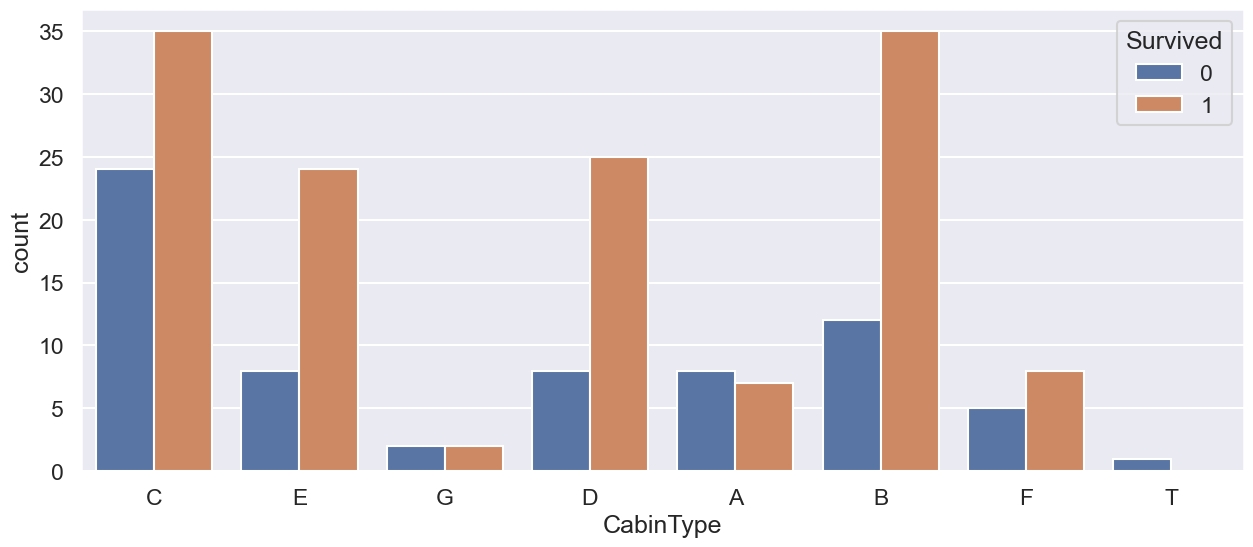

In [167]:
plt.figure(figsize=(15,6))
sns.countplot(x='CabinType', hue='Survived', data=dftitanic);

Dropping Cabin

In [172]:
dftitanic.groupby(['CabinType', 'Pclass'])['Pclass'].count()

CabinType  Pclass
A          1         15
B          1         47
C          1         59
D          1         29
           2          4
E          1         25
           2          4
           3          3
F          2          8
           3          5
G          3          4
T          1          1
Name: Pclass, dtype: int64

**Task 26:** 
Drop cabin from dfcomp

In [180]:
dfcomp['CabinType'] = dfcomp['Cabin'].str[0]

In [181]:
dfcomp['CabinType'].value_counts().reset_index()

,index,CabinType
0,C,35
1,B,18
2,D,13
3,E,9
4,F,8
5,A,7
6,G,1


In [185]:
dfcomp.groupby(['CabinType', 'Pclass'])['Pclass'].count()

CabinType  Pclass
A          1          7
B          1         18
C          1         35
D          1         11
           2          2
E          1          9
F          2          5
           3          3
G          3          1
Name: Pclass, dtype: int64

In [182]:
dfcomp.drop('Cabin',axis=1,inplace=True) #dropping cabin column

In [183]:
dfcomp

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Fsize,Tsize,Group,GrpSize,CabinType
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr,1,1,1,solo,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0,S,Mrs,2,1,2,couple,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr,1,1,1,solo,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr,1,1,1,solo,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Mrs,3,1,3,group,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.05,S,Mr,1,1,1,solo,NaN
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C,Rare Title,1,1,1,solo,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,S,Mr,1,1,1,solo,NaN
416,1308,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.05,S,Mr,1,1,1,solo,NaN


In [ ]:
#Write the code here


**Task 27:** Check missing values in dftitanic

In [204]:
#Write the code here
dftitanic.isnull().sum().reset_index()

,index,0
0,PassengerId,0
1,Survived,0
2,Pclass,0
3,Sex,0
4,SibSp,0
5,Parch,0
6,Embarked,0
7,Title,0
8,GrpSize,0
9,FareCat,0


**Task 28:** Checking missing values in **'dfcomp'**

In [ ]:
#wrtie the code here


## 5. Feature Selection

In [ ]:
sns.set_context('poster')

/var/folders/ns/dh5y29hd3rxf9lvsl6p7m3rw0000gn/T/ipykernel_2454/2807551671.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = dftitanic.drop('PassengerId',axis=1).corr()


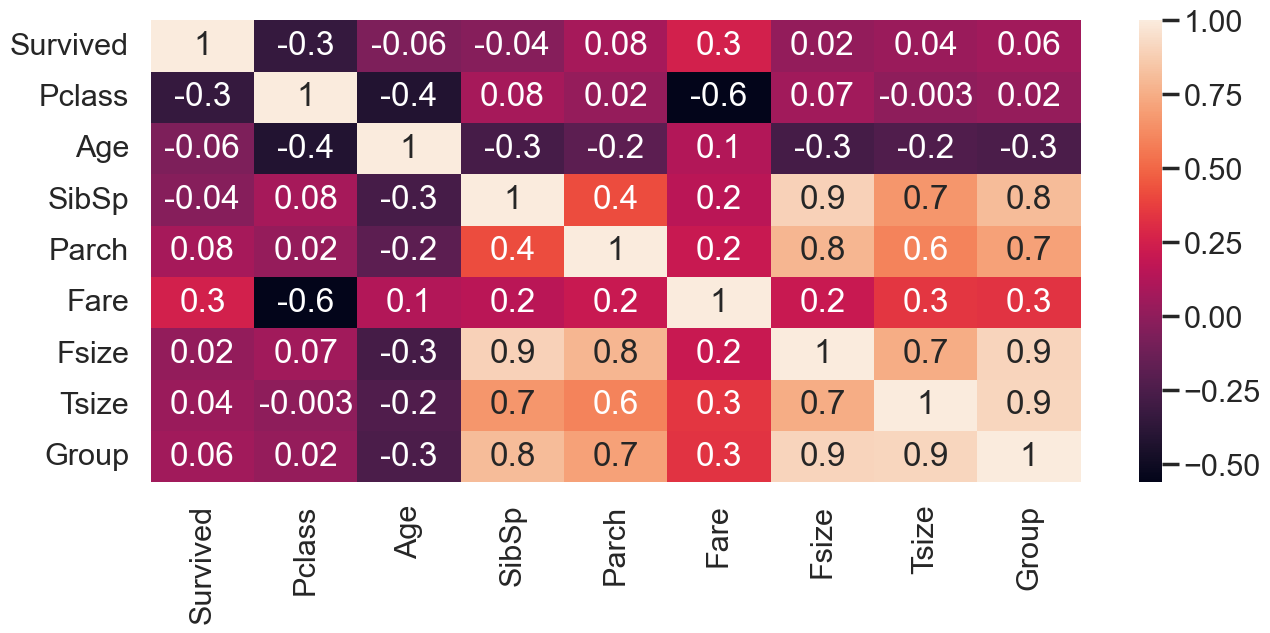

In [186]:
sns.set_context('poster')
plt.figure(figsize=(15,6))

cor = dftitanic.drop('PassengerId',axis=1).corr()
sns.heatmap(cor, annot=True, fmt='.1g');

The above heat map shows the corelation of different columns with eachother. A heatmap often helps to view the corelation as seen above. Looking at the above heatmap we can conclude that which attributes or columns are corelated and and can be removed to get a better shaped dataset.

The following points are to be considered for dropping the columns

- **'Group'** holds a corelation of 0.9 with **'Fsize'** and **'Tsize'**. So we will remove **'Group'** and **'Tsize'** because related data can be found in **'GrpSize'**.
- **'Fsize'** still has a corelation of 0.9  with **'SibSp'** and 0.8 with **'Parch'**.So we will remove 'Fsize' because **'SibSp'** and **'Parch'** are providing the required information.
- The **'Name'** column can also be removed because **'Title'** has been extracted.
- Similarly **'Age'** and **'Fare'** can also be removed because **'AgeCat'** and **'FareCat'** provide the related information.

So the final columns to be dropped are: 'Name','Age','Fare','Ticket','Fsize','Tsize' and 'Group'


In [191]:
dftitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Fsize,Tsize,Group,GrpSize,FareCat,AgeCat,CabinType
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,2,1,2,couple,0-10,16-32,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,2,1,2,couple,70-100,32-48,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1,1,1,solo,0-10,16-32,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,2,2,2,couple,40-70,32-48,C
4,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,S,Mr,2,2,2,couple,40-70,32-48,C


In [201]:
drop_features = ['Name','Age','Fare','Ticket','Fsize','Tsize','Group','CabinType'] #we need to drop these columns

Selecting final features

In [202]:
dftitanic.drop(drop_features,axis=1,inplace=True)

In [203]:
dftitanic.head()


,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,GrpSize,FareCat,AgeCat
0,1,0,3,male,1,0,S,Mr,couple,0-10,16-32
1,2,1,1,female,1,0,C,Mrs,couple,70-100,32-48
2,3,1,3,female,0,0,S,Miss,solo,0-10,16-32
3,4,1,1,female,1,0,S,Mrs,couple,40-70,32-48
4,138,0,1,male,1,0,S,Mr,couple,40-70,32-48


**Task 29:** Draw the heatmap as shown above and find the co-relation. Also check which features are to be removed.

In [ ]:
#Write the code for heat map here



**Task 30:** Drop the features in dfcomp using **drop_features**

In [ ]:
#Write the code to drop the columns here


Exporting final dataset in csv file

In [ ]:
dftitanic.to_csv('titanic_clean.csv',index=False) 
#index=false as csv indexing and dataframe indexing is different, so it should not get mixed

**Task 31:** Export **'dfcomp'** into csv file

In [ ]:
#Write code here
